# GOOGLE PLAY STORE REVIEW ANALYSATION

## Part 1. Giới thiệu

*Về Google Play Store*

*Google Play* là một dịch vụ phân phối kỹ thuật số được điều hành và phát triển bởi Google LLC. Nó đóng vai trò là kho ứng dụng chính thức cho hệ điều hành Android, cho phép người dùng duyệt và tải xuống các ứng dụng được phát triển với bộ công cụ phát triển phần mềm Android (SDK) và được xuất bản thông qua Google. Google Play cũng phục vụ như một cửa hàng truyền thông kỹ thuật số, cung cấp âm nhạc, sách, phim và chương trình truyền hình. 
Các ứng dụng có sẵn thông qua Google Play bao gồm cả miễn phí hoặc có tính phí. 
Tính đến năm 2017, Google Play có hơn 3,5 triệu ứng dụng Android. Người dùng ở hơn 145 quốc gia có thể mua & sử dụng các ứng dụng Google Play.

*Nguồn dữ liệu*
Dữ liệu này được lấy từ Google Play Store trong khoảng thời gian đầu năm 2018. 



## Part 2. Giải thích các biến số

- Name:  Tên ứng dụng trên Google Play
- Categary:  Phân loại ứng dụng dựa vào chức năng tương ứng
- Rating:  Mức độ đánh giá (gọi là số sao) trung bình được người dùng bình chọn trên Google Play (từ 0 - 5 sao)
- Reviews:  Số lượt phản hồi về ứng dụng từ phía người dùng tới nhà phát hành ứng dụng
- Size:  kích thước (dung lượng) ứng dụng
- Install:  số lượt tải về và cài đặt ứng dụng
- Type:  thuộc loại ứng dụng trả phí (Paid) hoặc miễn phí (Free)
- Price:  Số tiền phải trả để mua ứng dụng. Price là 0 nếu Type là Free, Price khác 0 nếu Type là Paid. Price được tính theo đơn vị $
- Content Rating :  Phạm vi người dùng được khuyến khích bởi nhà phát hành ứng dụng, có thể kèm theo độ tuổi
- Genres :  loại (lĩnh vực) của ứng dụng
- Last Updated :  ngày gần nhất mà ứng dụng được cập nhật bởi nhà phát hành
- Current Ver :  phiên bản hiện tại của ứng dụng
- Android Ver :  phiên bản Android tương thích với ứng dụng được khuyến khích bởi nhà phát hành

## Part 3. Các thư viện sử dụng 

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import seaborn as sns

## Part 4. Đọc dữ liệu từ dataset 

*(Dữ liệu này gồm 13 cột, 10841 dòng)*

In [3]:
df = pd.read_csv('data/googleplaystore.csv')
df.head(5).append(df.tail(5))

C:\Users\PC\AppData\Local\Temp\ipykernel_10584\335402761.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(5).append(df.tail(5))


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-1,"1,000",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19,"10,000,000",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


## Part 5. Cấu trúc của dữ liệu

In [4]:
df.describe().T.style.set_properties(**{'background-color': 'black','color': 'white','border-color': 'red'})

,count,mean,std,min,25%,50%,75%,max
Rating,9367.000000,4.193338,0.537431,1.000000,4.000000,4.300000,4.500000,19.000000


## Part 6. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*Kết quả cho thấy dataset có tổng cộng 10841 dòng, với 12 cột. Không có cột nào có giá trị null.*

In [6]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               461
Installs            21
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64

*Qua kết quả trên cho thấy số trường hợp của các biến phân loại:*
- Category: 34 loại khác nhau
- Type: 3 loại khác nhau
- Content Rating: 6 loại khác nhau
- Genres: 120 loại khác nhau

**Xử lí dữ liệu rác và ép kiểu**

Do dữ liệu ở cột **Installs** dùng dấu ',' để phân cách phần thập phân và ở dạng xâu, ta phải thay thế dấu ',' bằng dấu '.' và ép kiểu sang số.

In [7]:
lst = df.Installs.tolist()

n = len(lst)
for i in range(n):
    lst[i] = str(lst[i]).replace(',','')
    
lst.remove("Free") #Có một dòng bị mang giá trị này nên phải xoá bỏ dòng đó để có thể ép kiểu

lst = pd.Series(lst)
df.Installs = lst

df.Installs = df.Installs.astype(float)

Chuyển dữ liệu cột **Size** (MB) sang dạng float

In [8]:
lst = df.Size.tolist()

lst.remove("1,000+")
lst = pd.Series(lst)
df.Size = lst

df.Size = df.Size.astype(float)

Chuyển dữ liệu ở cột **Reviews** sang dạng float

In [9]:
lst = df.Reviews.tolist()

lst.remove("3.0M")
lst = pd.Series(lst)
df.Reviews = lst

df.Reviews = df.Reviews.astype(float)

Kiểu dữ liệu của các cột sau khi xử lí:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


## Part 7: Các câu hỏi nghiên cứu

1. Có phải thể loại ứng dụng (Category) ảnh hưởng đến số lượt tải (Installs) của ứng dụng không ?
2. Liệu thể loại ứng dụng (Category) có ảnh hưởng tới độ tuổi quy định của ứng dụng (Content Rating) hay không ?
3. Sự ảnh hưởng của độ tuổi quy định (Content Rating) tới điểm đánh giá ứng dụng (Rating) trên CH play.
4. Liệu có phải có sự khác biệt lớn về điểm đánh giá ứng dụng (Rating) giữa những thể loại ứng dụng (Category) khác nhau hay không ?
5. Các ứng dụng trả phí và không trả phí có sự khác biệt như thế nào về đánh giá của người dùng, liệu có phải những ứng dụng trả phí được đánh giá cao hơn không ? 

## Part 8: Trực quan hoá dữ liệu

## Biểu đồ piechart thể hiện tỉ lệ của các biến phân loại

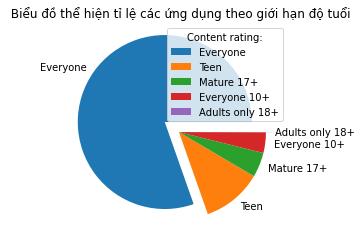

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


In [11]:
CR_pie = df['Content Rating'].value_counts()

CR_pie_keys = ['Everyone','Teen','Mature 17+','Everyone 10+', 'Adults only 18+','']

CR_pie_explode = [0.2, 0, 0, 0,0, 0.2]

plt.pie(CR_pie.values,labels = CR_pie_keys, explode = CR_pie_explode)

plt.title(" Biểu đồ thể hiện tỉ lệ các ứng dụng theo giới hạn độ tuổi")

plt.legend(title = "Content rating:")

plt.show()

print(CR_pie)

**Qua biểu đồ ta thấy Content Rating (giới  hạn độ tuổi) của các ứng dụng chiếm tỉ lệ từ cao nhất đến thấp nhất là: **
1. Everyone
2. Teen
3. Mature 17+
4. Everyone 10+
5. Adult only 18+

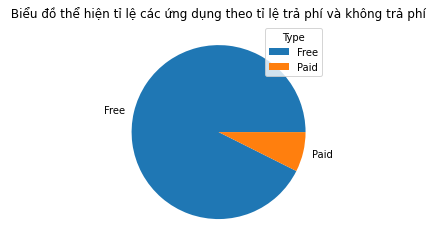

Free    10039
Paid      800
0           1
Name: Type, dtype: int64


In [12]:
Type_pie = df['Type'].value_counts()

Type_pie_keys = ['Free','Paid','']

Type_pie_explode = [0,0,0]

plt.pie(Type_pie.values,labels = Type_pie_keys, explode = Type_pie_explode)

plt.title(' Biểu đồ thể hiện tỉ lệ các ứng dụng theo tỉ lệ trả phí và không trả phí ')

plt.legend(title = "Type")

plt.show()

print(Type_pie)

**Qua biểu đồ ta thấy Type (Loại ứng dụng) của các ứng dụng chủ yếu là miễn phí, những ứng dụng trả phí chỉ chiếm phần khá nhỏ.**

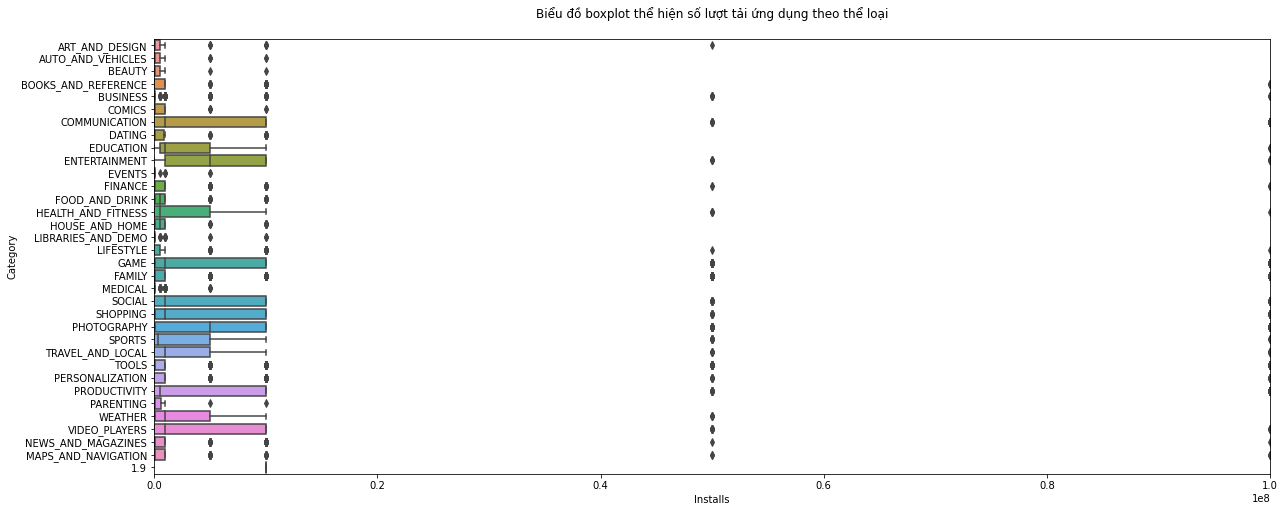

In [13]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data = df, x = "Installs", y = "Category")
ax.set_xlim(0,100000000)
plt.title('Biểu đồ boxplot thể hiện số lượt tải ứng dụng theo thể loại\n')
plt.show()

**Nhận xét: Qua biểu đồ ta thấy được**
- Hầu như mỗi nhóm thể loại đều có các outlier
- Các outlier có giá trị cách biệt rất lớn với Median của mỗi nhóm
- Những nhóm ứng dụng có tập giá trị phân bố đều nhất là: Communication (Ứng dụng để giao tiếp), Entertainment (Ứng dụng giải trí), Education (Ứng dụng giáo dục), Heath_and_fitness (Ứng dụng cho sức khoẻ & thể hình), Game, Social (Ứng dụng xã hội), Shopping (Ứng dụng mua sắm),....

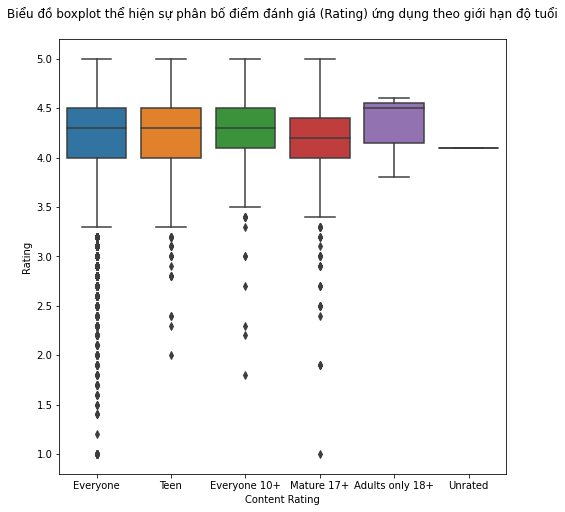

In [14]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data = df, x = "Content Rating", y = "Rating")
plt.title("Biểu đồ boxplot thể hiện sự phân bố điểm đánh giá (Rating) ứng dụng theo giới hạn độ tuổi\n")
plt.show()

**Nhận xét:**

Qua biểu đồ ta nhận thấy:
- Các ứng dụng cho mọi người (Everyone) có rất nhiều các outlier và rải rác đều.
- Các ứng dụng cho người lớn (Adults only 18+) hoàn toàn không có outlier.
- Các ứng dụng không được phân loại độ tuổi (Unrated) có quá ít nên không thể hiện trên biểu đồ được.

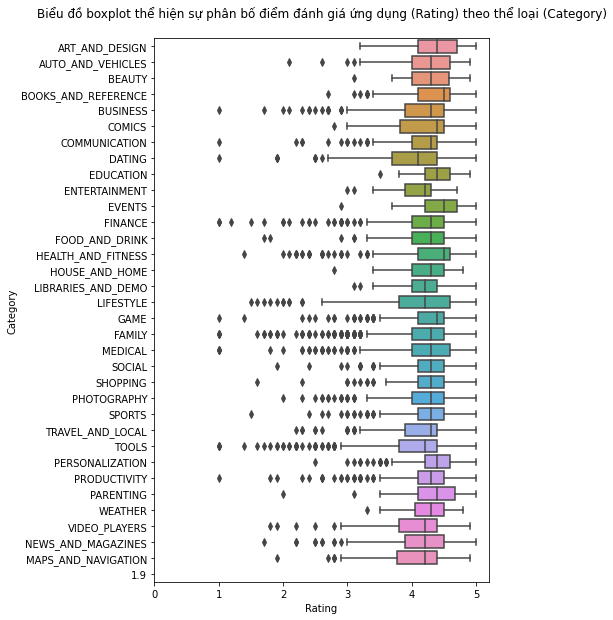

In [15]:
plt.figure(figsize=(6,10))
ax = sns.boxplot(data = df, y = "Category", x = "Rating")
ax.set_xlim(0,5.2)
plt.title('Biểu đồ boxplot thể hiện sự phân bố điểm đánh giá ứng dụng (Rating) theo thể loại (Category)\n')
plt.show()

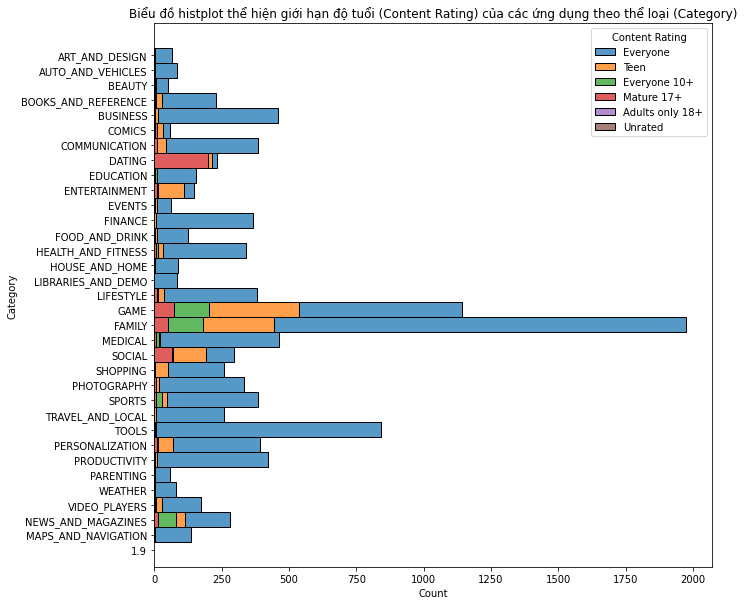

In [16]:
plt.figure(figsize=(10,10))
ax = sns.histplot(data = df, y = "Category", hue = "Content Rating", multiple='stack')
#plt.legend("Content Rating")
plt.title("Biểu đồ histplot thể hiện giới hạn độ tuổi (Content Rating) của các ứng dụng theo thể loại (Category)")
plt.show()

In [17]:
ts = pd.DataFrame(df)
gk = ts.groupby('Category')['Installs'].agg({'count', 'sum', 'mean', 'var'})
gk

,var,mean,count,sum
Category,,,,
1.9,NaN,1.000000e+07,1,1.000000e+07
ART_AND_DESIGN,4.441970e+13,1.912894e+06,65,1.243381e+08
AUTO_AND_VEHICLES,3.049743e+12,6.261425e+05,85,5.322211e+07
BEAUTY,2.319955e+12,5.131519e+05,53,2.719705e+07
BOOKS_AND_REFERENCE,4.550565e+15,8.359975e+06,231,1.931154e+09
BUSINESS,1.248022e+14,2.395752e+06,460,1.102046e+09
COMICS,4.422900e+12,9.347692e+05,60,5.608615e+07
COMMUNICATION,5.418111e+16,8.441415e+07,387,3.266828e+10
DATING,7.478730e+12,1.171841e+06,234,2.742108e+08


In [18]:
print(gk)

                              var          mean  count           sum
Category                                                            
1.9                           NaN  1.000000e+07      1  1.000000e+07
ART_AND_DESIGN       4.441970e+13  1.912894e+06     65  1.243381e+08
AUTO_AND_VEHICLES    3.049743e+12  6.261425e+05     85  5.322211e+07
BEAUTY               2.319955e+12  5.131519e+05     53  2.719705e+07
BOOKS_AND_REFERENCE  4.550565e+15  8.359975e+06    231  1.931154e+09
BUSINESS             1.248022e+14  2.395752e+06    460  1.102046e+09
COMICS               4.422900e+12  9.347692e+05     60  5.608615e+07
COMMUNICATION        5.418111e+16  8.441415e+07    387  3.266828e+10
DATING               7.478730e+12  1.171841e+06    234  2.742108e+08
EDUCATION            2.499200e+14  5.586231e+06    156  8.714520e+08
ENTERTAINMENT        7.179245e+15  1.925611e+07    149  2.869160e+09
EVENTS               7.998291e+11  2.497305e+05     64  1.598275e+07
FAMILY               1.071971e+15 

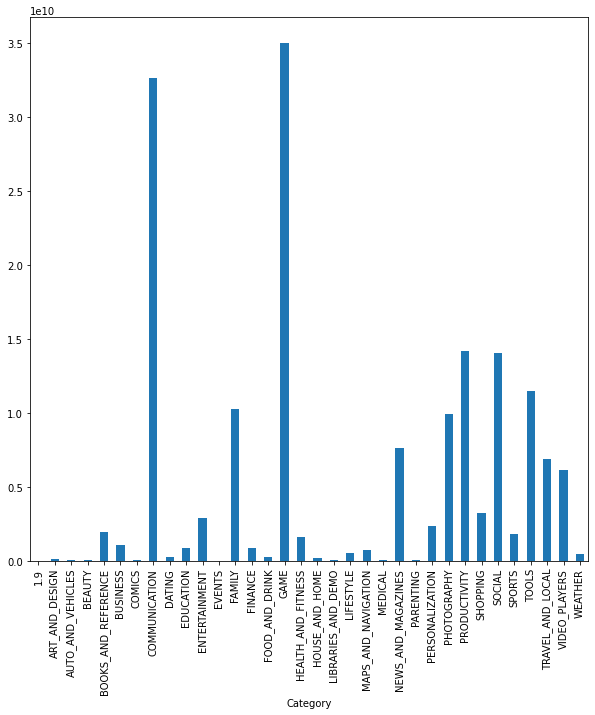

In [19]:
plt.figure(figsize=(10,10))
gk['sum'].plot.bar()
plt.show()

In [20]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,4.0,3.6,100.0,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,3.0,9.5,1000.0,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,114.0,-1.0,1000.0,Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,398307.0,19.0,10000000.0,Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [21]:
gkk = df.groupby(['Category', 'Content Rating'])['App'].agg({'count'})
gkk

count
Category          Content Rating       
ART_AND_DESIGN    Everyone           61
                  Everyone 10+        1
                  Teen                3
AUTO_AND_VEHICLES Everyone           83
                  Everyone 10+        1
...                                 ...
VIDEO_PLAYERS     Teen               24
WEATHER           Everyone           78
                  Everyone 10+        1
                  Mature 17+          1
                  Teen                2

[118 rows x 1 columns]

In [22]:
type(gkk)

pandas.core.frame.DataFrame

In [23]:
lst = gkk.index.to_list()
ax = []
ay = []
for v in lst:
    ax.append(v[0])
    ay.append(v[1])
ax = list(set(ax))
ay = list(set(ay))
ax.sort()
ay.sort()

In [24]:
cmp = pd.DataFrame(index = ax, columns = ay)
for (col, row) in cmp.iteritems():
    for ind in gkk.index:
        if ind[1] == col:
            print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [25]:
gkk['count']

Category           Content Rating
ART_AND_DESIGN     Everyone          61
                   Everyone 10+       1
                   Teen               3
AUTO_AND_VEHICLES  Everyone          83
                   Everyone 10+       1
                                     ..
VIDEO_PLAYERS      Teen              24
WEATHER            Everyone          78
                   Everyone 10+       1
                   Mature 17+         1
                   Teen               2
Name: count, Length: 118, dtype: int64

In [26]:
for ind in gkk.index:
    print(ind)

('ART_AND_DESIGN', 'Everyone')
('ART_AND_DESIGN', 'Everyone 10+')
('ART_AND_DESIGN', 'Teen')
('AUTO_AND_VEHICLES', 'Everyone')
('AUTO_AND_VEHICLES', 'Everyone 10+')
('AUTO_AND_VEHICLES', 'Teen')
('BEAUTY', 'Everyone')
('BEAUTY', 'Everyone 10+')
('BEAUTY', 'Mature 17+')
('BEAUTY', 'Teen')
('BOOKS_AND_REFERENCE', 'Everyone')
('BOOKS_AND_REFERENCE', 'Everyone 10+')
('BOOKS_AND_REFERENCE', 'Mature 17+')
('BOOKS_AND_REFERENCE', 'Teen')
('BUSINESS', 'Everyone')
('BUSINESS', 'Everyone 10+')
('BUSINESS', 'Mature 17+')
('BUSINESS', 'Teen')
('COMICS', 'Adults only 18+')
('COMICS', 'Everyone')
('COMICS', 'Everyone 10+')
('COMICS', 'Mature 17+')
('COMICS', 'Teen')
('COMMUNICATION', 'Everyone')
('COMMUNICATION', 'Mature 17+')
('COMMUNICATION', 'Teen')
('DATING', 'Everyone')
('DATING', 'Mature 17+')
('DATING', 'Teen')
('EDUCATION', 'Everyone')
('EDUCATION', 'Everyone 10+')
('EDUCATION', 'Mature 17+')
('EDUCATION', 'Teen')
('ENTERTAINMENT', 'Everyone')
('ENTERTAINMENT', 'Everyone 10+')
('ENTERTAINMEN

In [27]:
for (col, row) in cmp.iteritems():
    for ind in gkk.index:
        if ind[1] == col:
            print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [28]:
run = 1
for (col, row) in cmp.iteritems():
    for ind in gkk.index:
        if ind[1] == col:
            if run == 1 and ind[0] == ART_AND_DESIGN	:
                
    run += 1

IndentationError: expected an indented block after 'if' statement on line 5 (3961213433.py, line 7)

In [ ]:
for (col, row) in cmp.iteritems():
    print(type(col))

In [29]:
print(gkk['count'])

Category           Content Rating
ART_AND_DESIGN     Everyone          61
                   Everyone 10+       1
                   Teen               3
AUTO_AND_VEHICLES  Everyone          83
                   Everyone 10+       1
                                     ..
VIDEO_PLAYERS      Teen              24
WEATHER            Everyone          78
                   Everyone 10+       1
                   Mature 17+         1
                   Teen               2
Name: count, Length: 118, dtype: int64


In [30]:
cmp

,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN
AUTO_AND_VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN
BEAUTY,NaN,NaN,NaN,NaN,NaN,NaN
BOOKS_AND_REFERENCE,NaN,NaN,NaN,NaN,NaN,NaN
BUSINESS,NaN,NaN,NaN,NaN,NaN,NaN
COMICS,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNICATION,NaN,NaN,NaN,NaN,NaN,NaN
DATING,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,NaN,NaN,NaN,NaN,NaN,NaN
ENTERTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN
